In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset.zip')

In [4]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [5]:
df.tail()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99
2277,83727.0,Adult,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76


In [7]:
#columns and rows
df.shape

(2278, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [9]:
#data uniqueness
df.nunique()

,0
SEQN,2278
age_group,2
RIDAGEYR,69
RIAGENDR,2
PAQ605,3
BMXBMI,340
LBXGLU,101
DIQ010,3
LBXGLT,232
LBXIN,1424


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SEQN,2278.0,78691.853819,2921.365151,73564.00,76171.75,78749.00,81213.50,83727.00
RIDAGEYR,2278.0,41.795874,20.156111,12.00,24.00,41.00,58.00,80.00
RIAGENDR,2278.0,1.511414,0.499979,1.00,1.00,2.00,2.00,2.00
PAQ605,2278.0,1.822651,0.398918,1.00,2.00,2.00,2.00,7.00
BMXBMI,2278.0,27.955180,7.248962,14.50,22.80,26.80,31.20,70.10
LBXGLU,2278.0,99.553117,17.889834,63.00,91.00,97.00,104.00,405.00
DIQ010,2278.0,2.016242,0.185556,1.00,2.00,2.00,2.00,3.00
LBXGLT,2278.0,114.978929,47.061239,40.00,87.00,105.00,130.00,604.00
LBXIN,2278.0,11.834794,9.718812,0.14,5.86,9.04,14.44,102.29


In [12]:
df.isnull().sum()

,0
SEQN,0
age_group,0
RIDAGEYR,0
RIAGENDR,0
PAQ605,0
BMXBMI,0
LBXGLU,0
DIQ010,0
LBXGLT,0
LBXIN,0


In [13]:
df.duplicated().sum()

0

In [14]:
#Gabbage
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("***"*10)

age_group
Adult     1914
Senior     364
Name: count, dtype: int64
******************************


In [16]:
pd.get_dummies(df,columns=['age_group'], drop_first=True)

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Senior
0,73564.0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,False
1,73568.0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,False
2,73576.0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,False
3,73577.0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15,False
4,73580.0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,False
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,False
2274,83712.0,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,False
2275,83713.0,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,False
2276,83718.0,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,False


In [17]:
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("***"*10)

age_group
Adult     1914
Senior     364
Name: count, dtype: int64
******************************


In [18]:
pd.get_dummies(df,columns=['age_group'], drop_first=1)

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Senior
0,73564.0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,False
1,73568.0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,False
2,73576.0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,False
3,73577.0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15,False
4,73580.0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,False
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,False
2274,83712.0,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,False
2275,83713.0,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,False
2276,83718.0,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,False


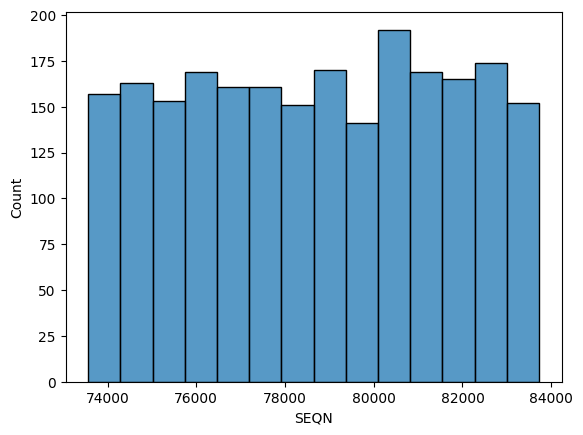

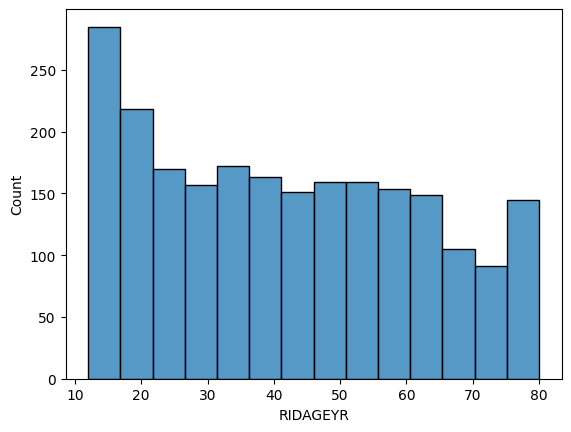

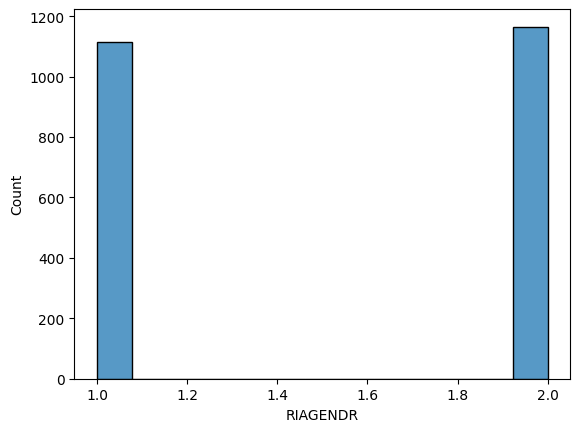

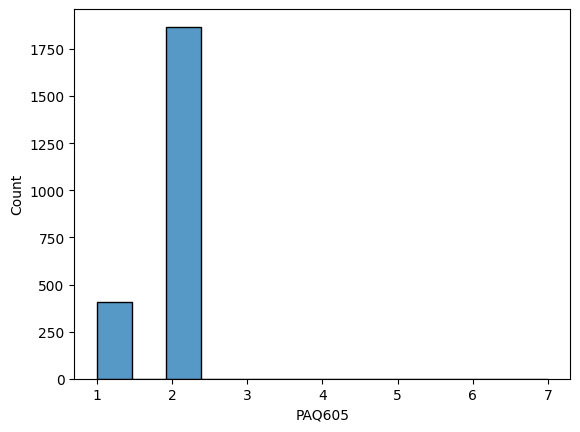

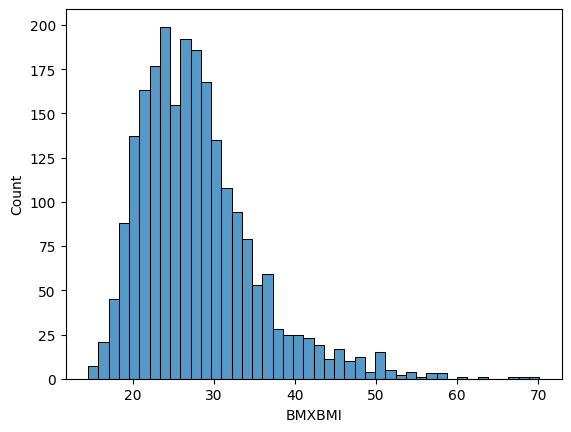

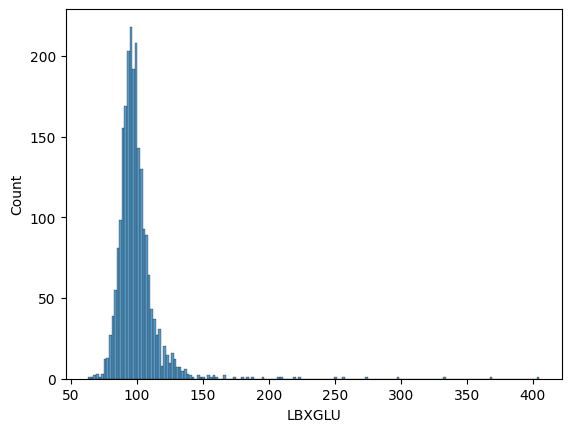

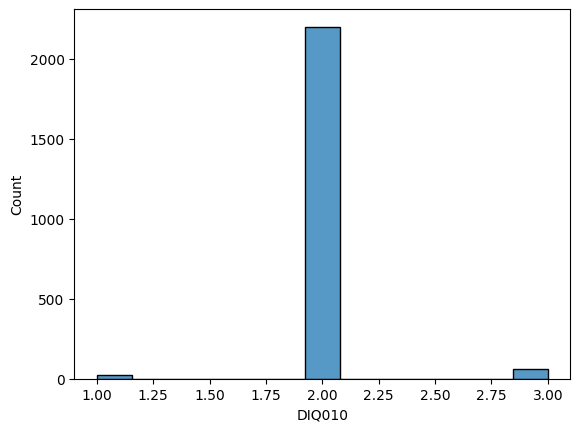

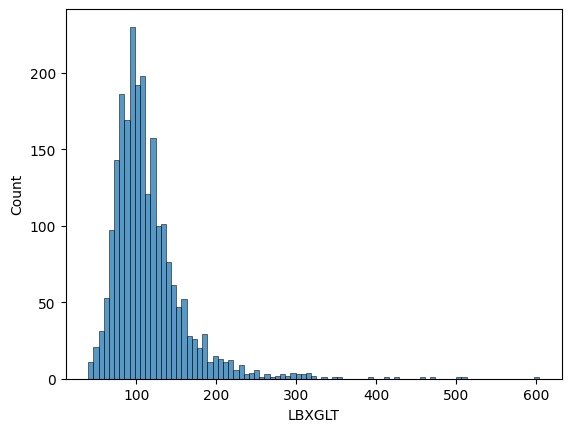

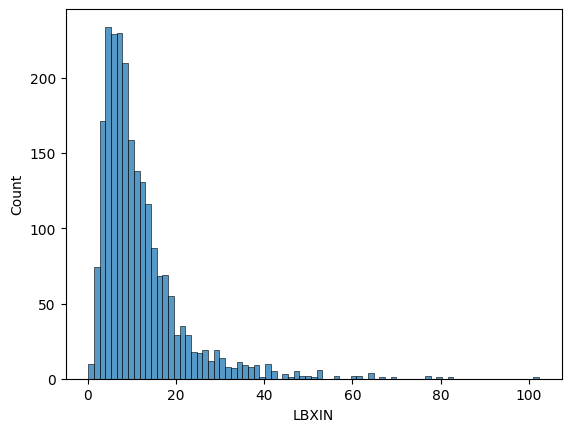

In [19]:
#Visualization
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data=df, x=i)
  plt.show()

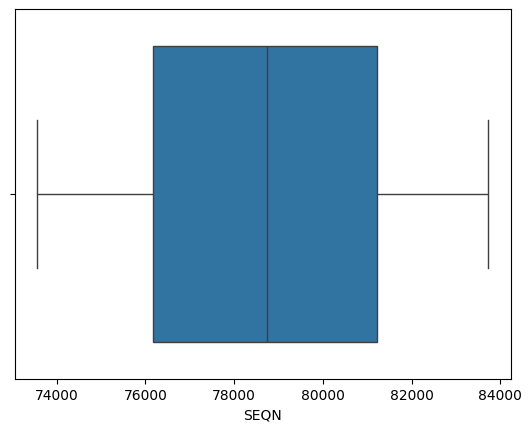

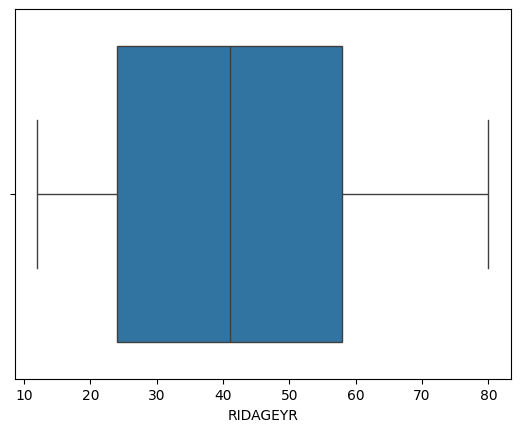

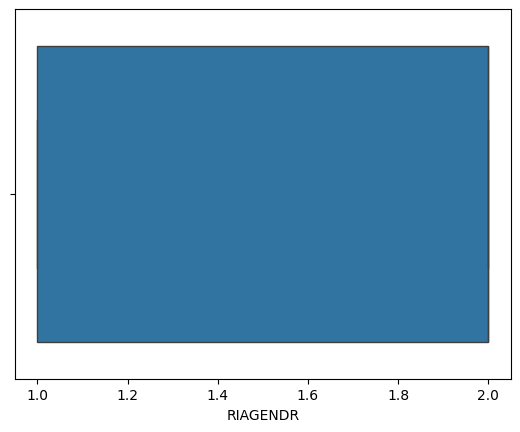

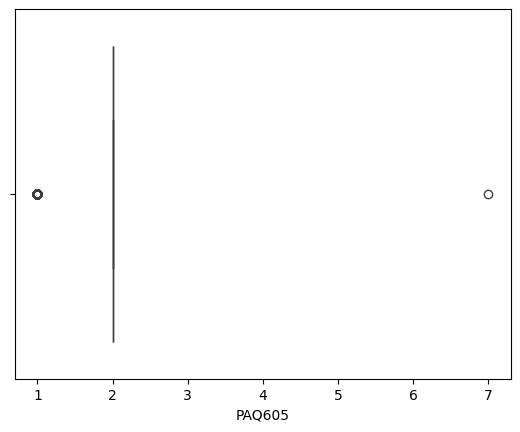

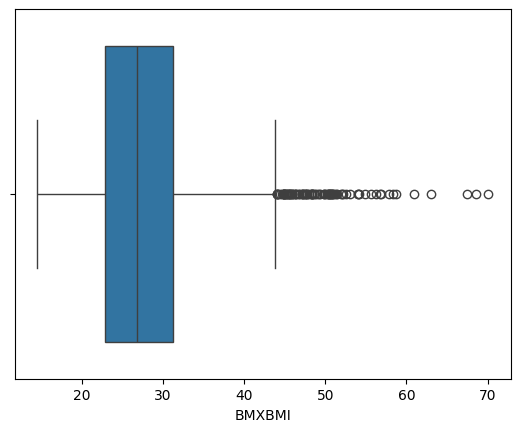

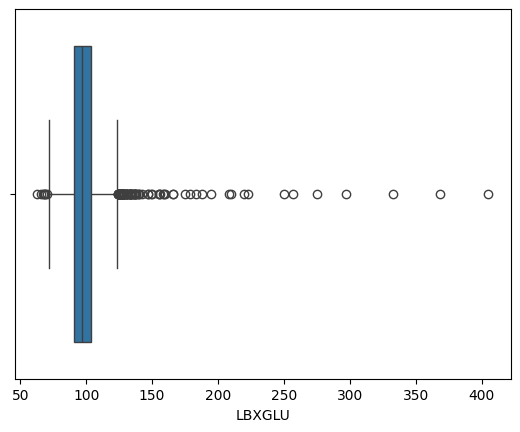

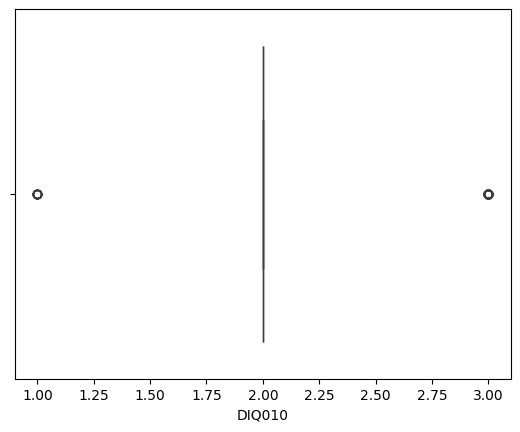

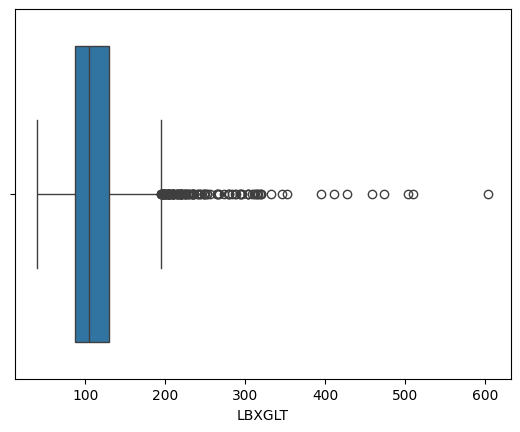

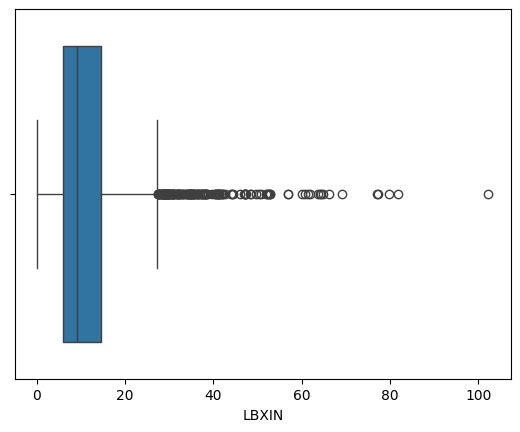

In [20]:
#outliers
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data=df, x=i)
  plt.show()

In [22]:
df.select_dtypes(include='object').columns

Index(['age_group'], dtype='object')

In [24]:
df.select_dtypes(include='number').columns

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010',
       'LBXGLT', 'LBXIN'],
      dtype='object')

In [25]:
#checking for correlation
df.select_dtypes(include='number').corr()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
SEQN,1.000000,-0.008806,-0.012962,-0.019701,-0.061343,-0.004147,0.014102,0.006036,-0.040028
RIDAGEYR,-0.008806,1.000000,0.006398,0.025973,0.147163,0.229624,0.049970,0.318044,-0.091879
RIAGENDR,-0.012962,0.006398,1.000000,0.151076,0.063873,-0.132342,-0.032769,0.017406,-0.016660
PAQ605,-0.019701,0.025973,0.151076,1.000000,-0.042935,-0.007849,-0.002599,0.060413,0.010011
BMXBMI,-0.061343,0.147163,0.063873,-0.042935,1.000000,0.208330,0.047133,0.193375,0.552717
LBXGLU,-0.004147,0.229624,-0.132342,-0.007849,0.208330,1.000000,-0.004427,0.685579,0.211911
DIQ010,0.014102,0.049970,-0.032769,-0.002599,0.047133,-0.004427,1.000000,0.009796,0.058986
LBXGLT,0.006036,0.318044,0.017406,0.060413,0.193375,0.685579,0.009796,1.000000,0.217272
LBXIN,-0.040028,-0.091879,-0.016660,0.010011,0.552717,0.211911,0.058986,0.217272,1.000000


In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

<Axes: >

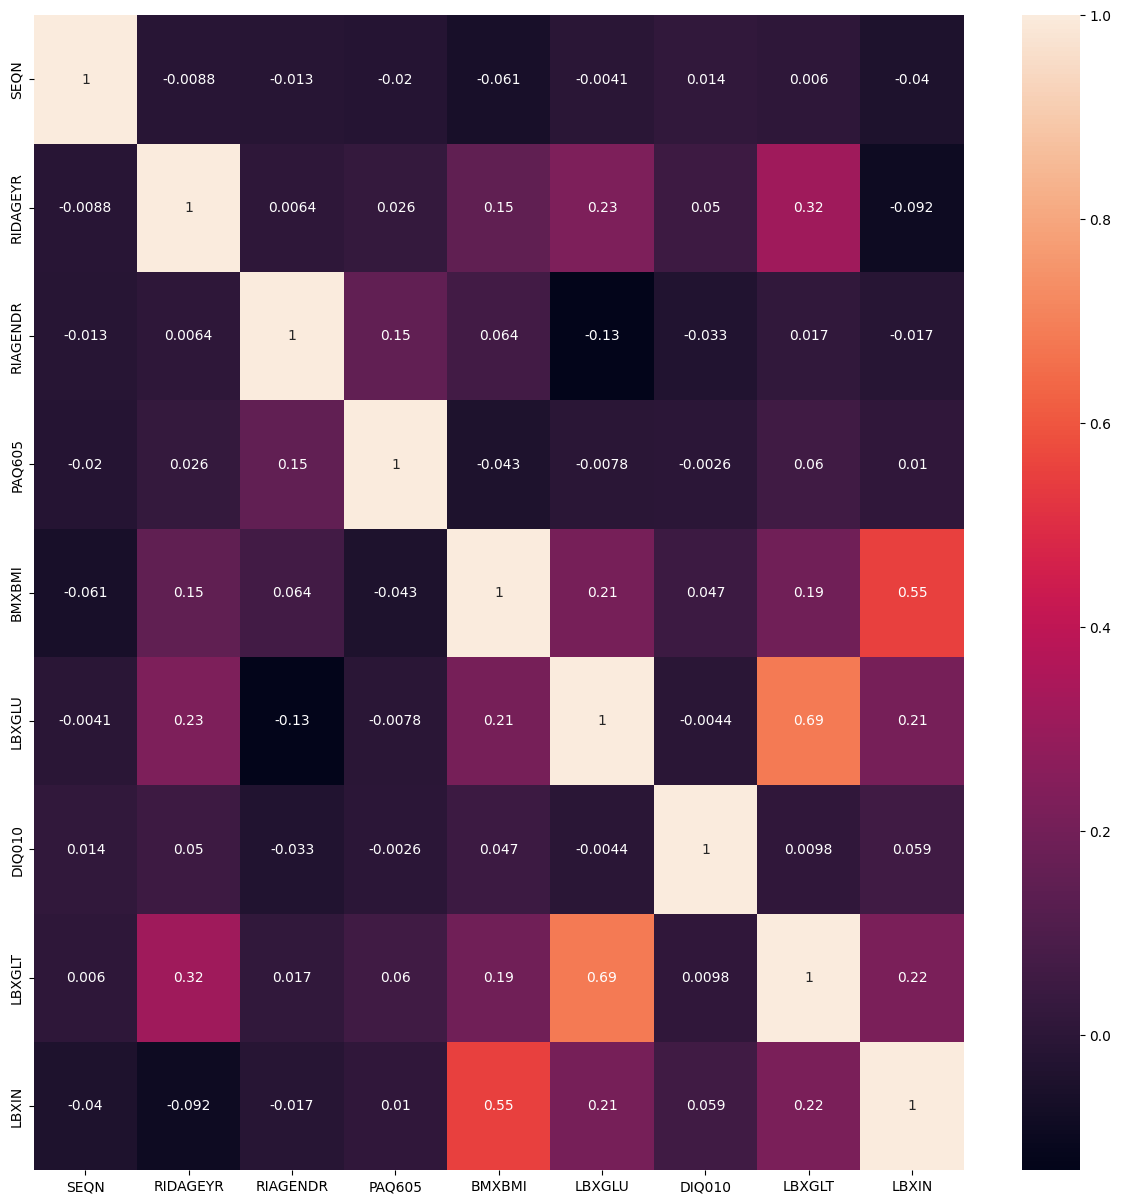

In [26]:
#heatmap-interpretes relationships btn variables
df.select_dtypes(include='number').corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

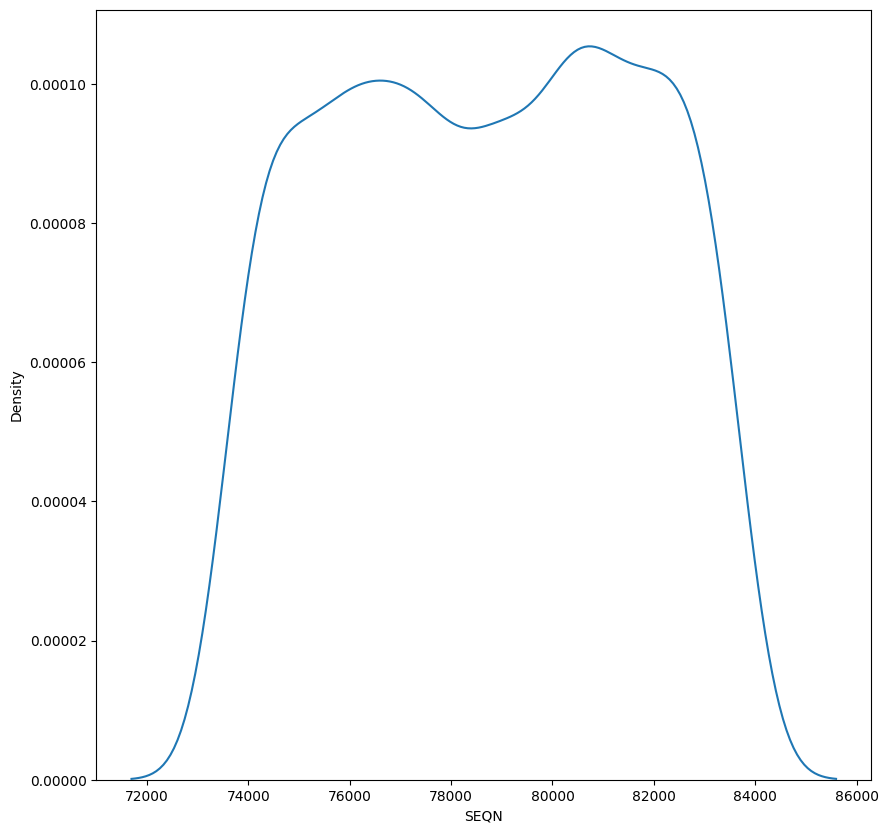

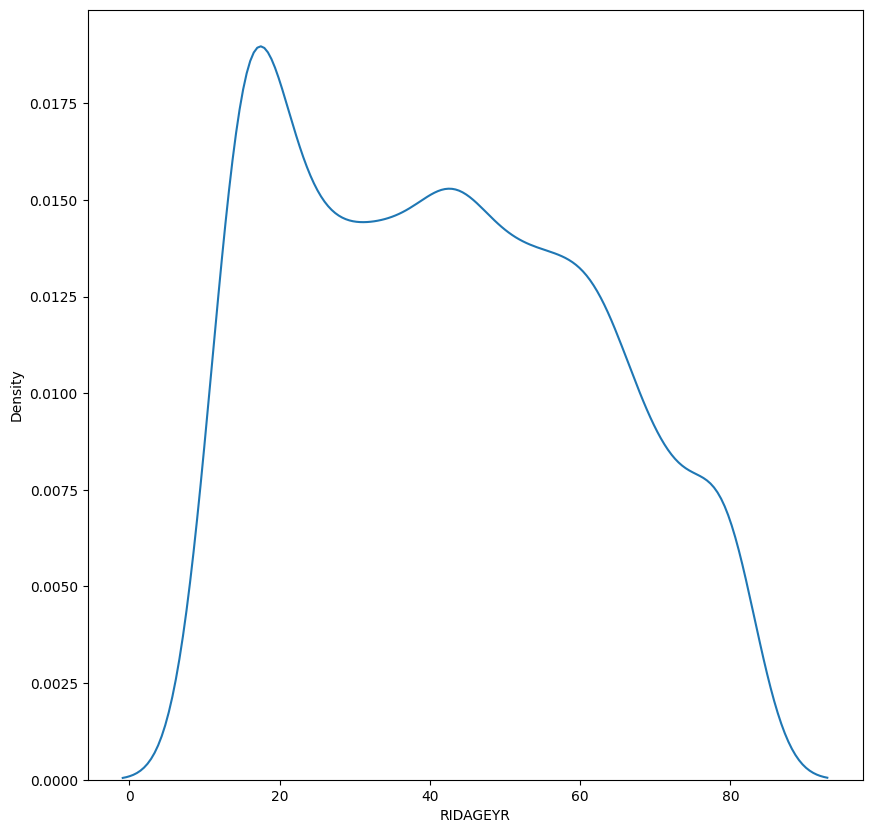

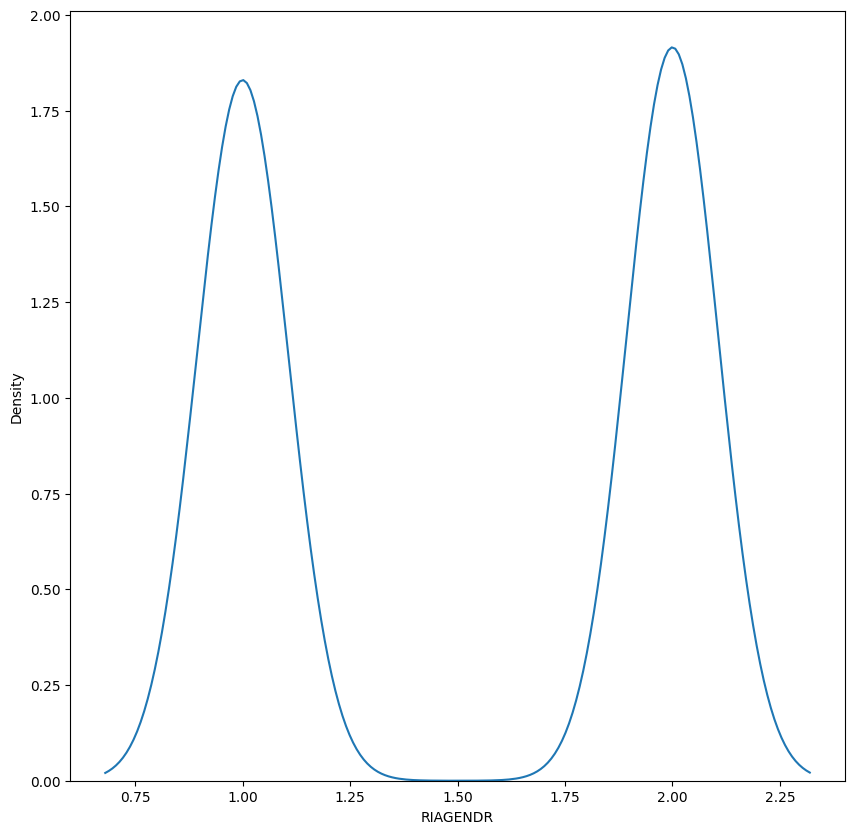

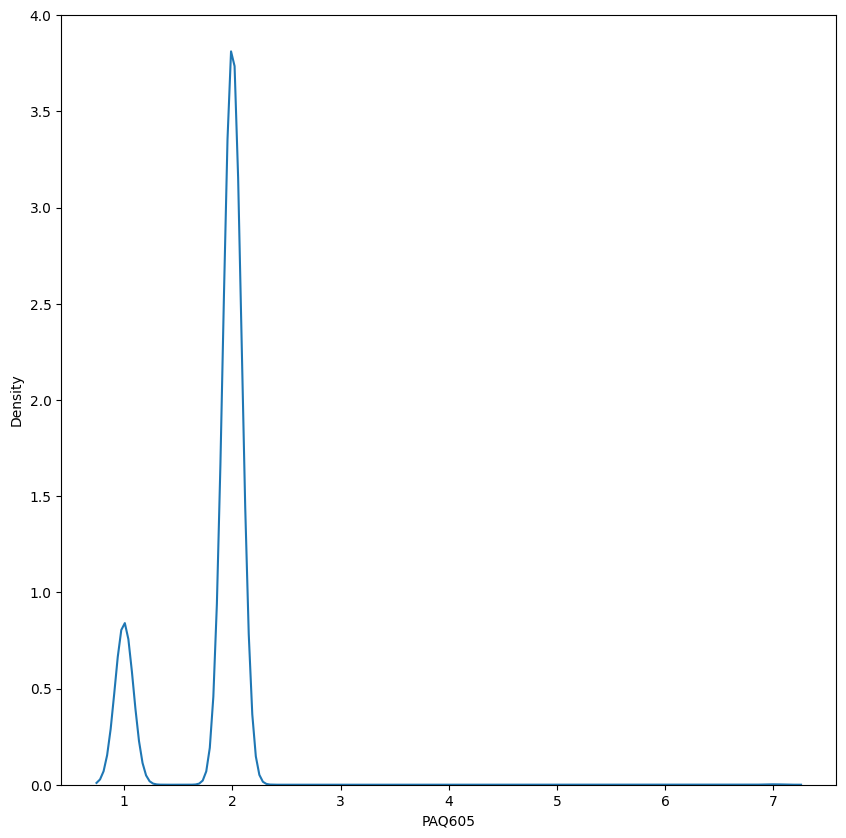

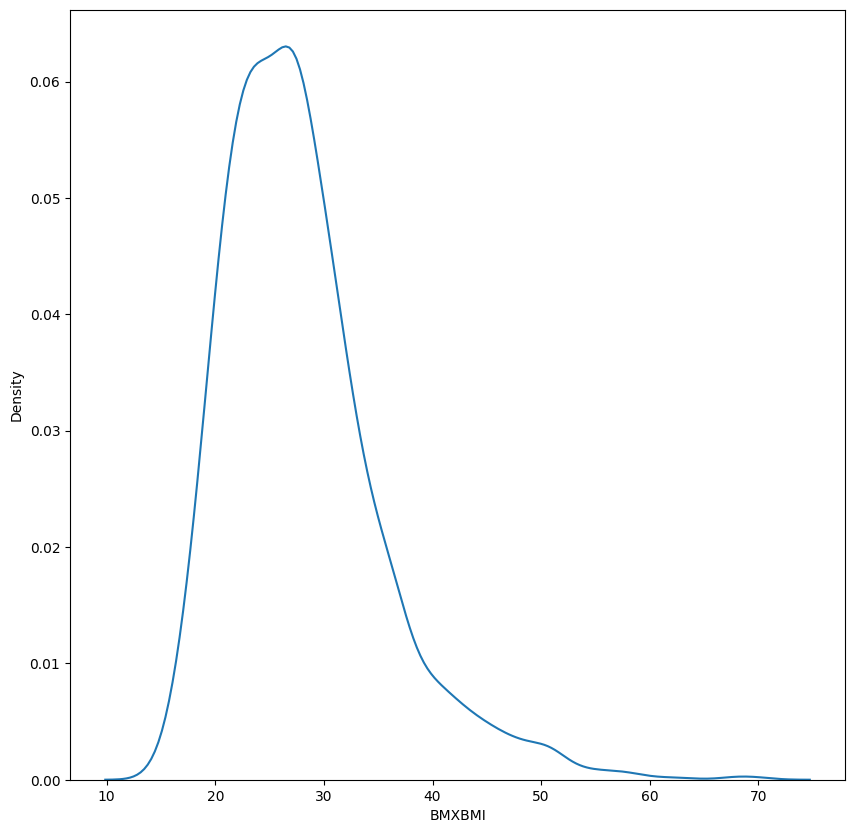

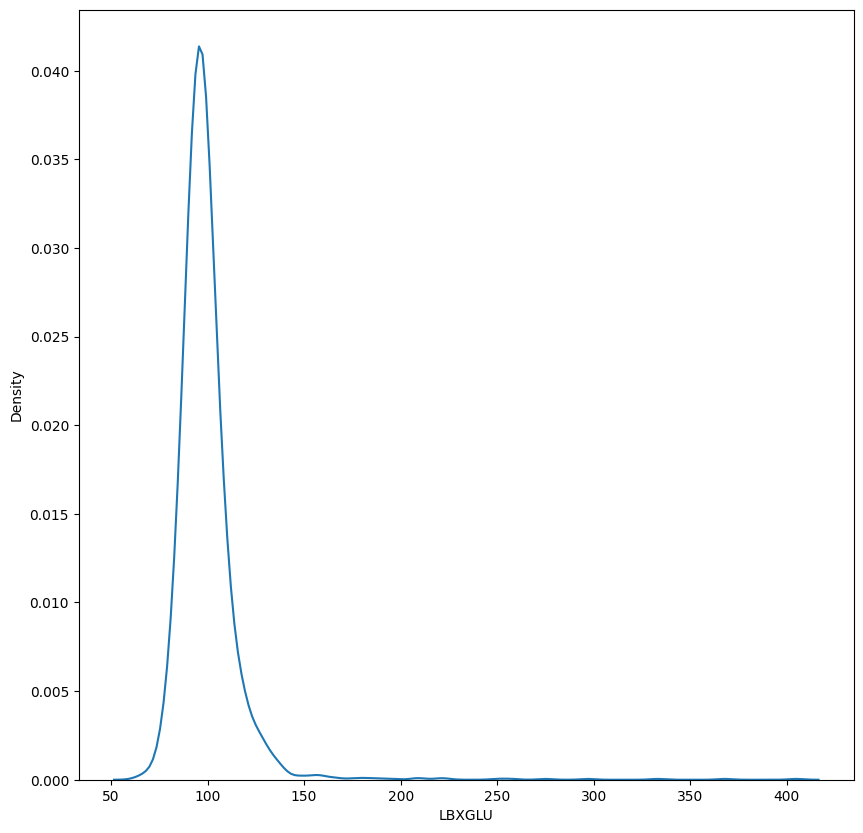

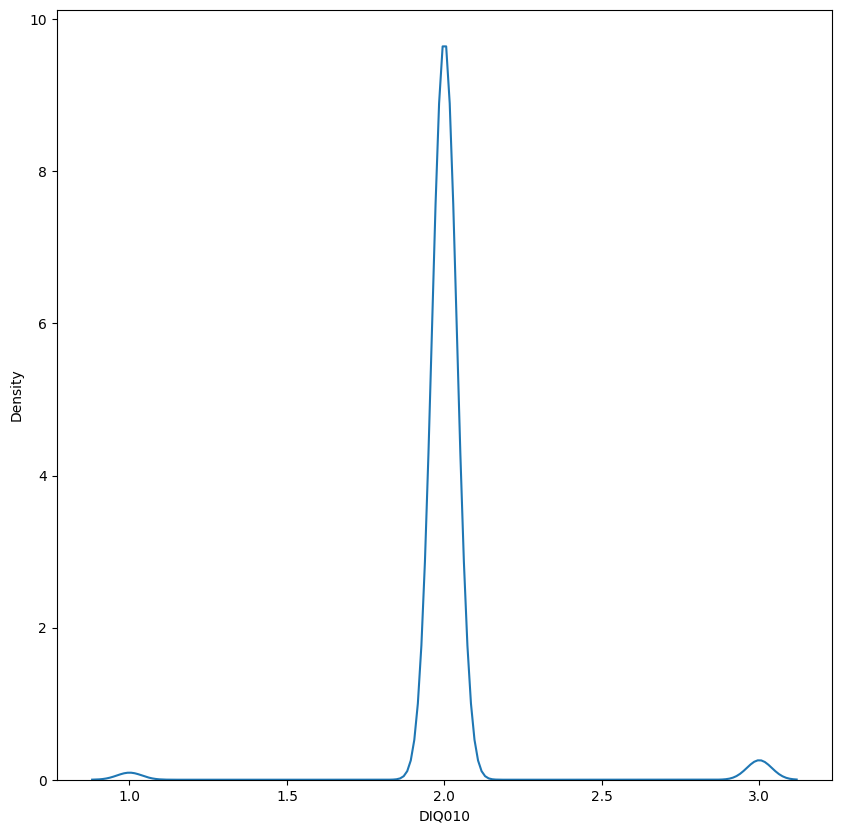

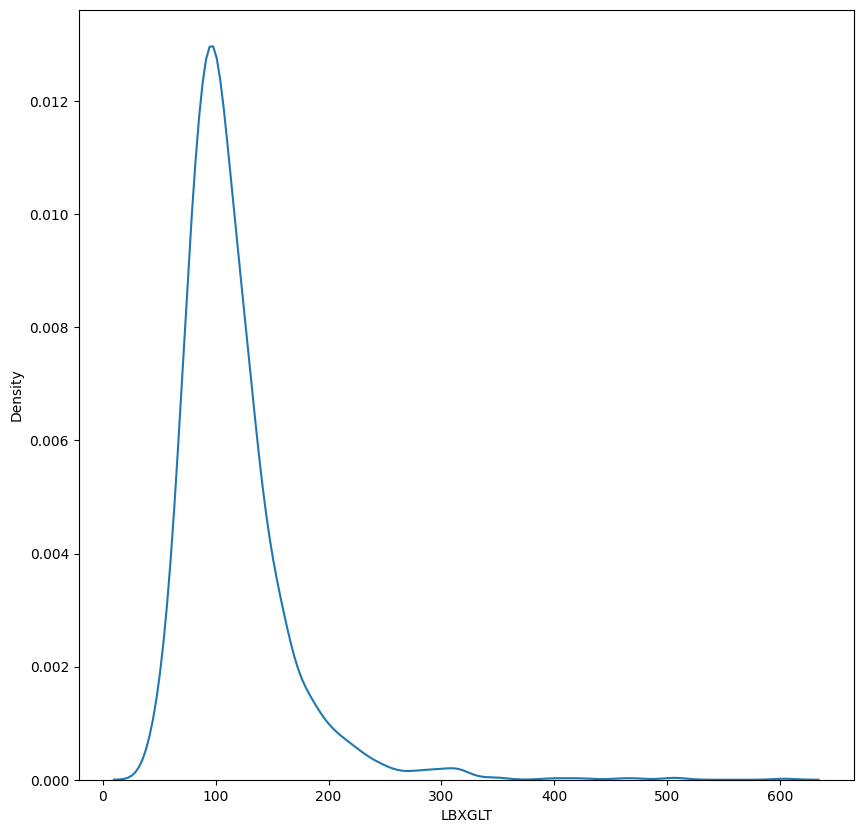

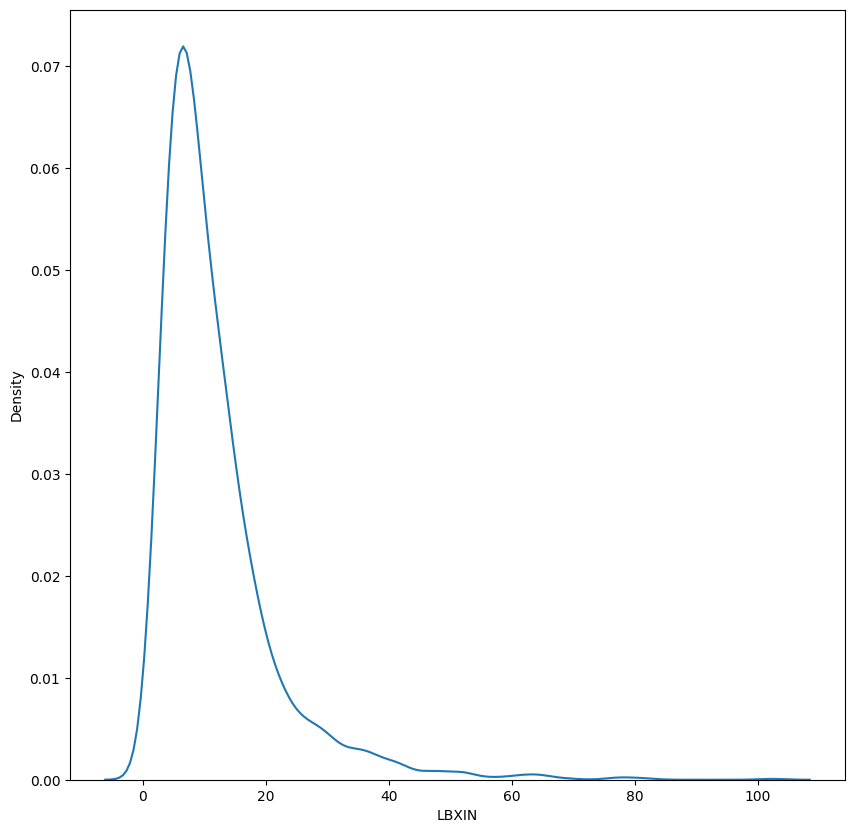

In [27]:
for i in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(10,10))
  sns.kdeplot(data=df, x=i)
  plt.show()